#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load dataset 

In [2]:
data_raw = pd.read_csv('data.csv', index_col = None)

#### Inspecting the dataset

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

In [4]:
data_raw.head()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


#### Removing unnecessary columns

In [5]:
data_raw.drop(['Unnamed: 0'], axis=1, inplace= True)

#### Checking for null values

In [6]:
data_raw.isnull().sum()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

In [7]:
data_raw[['activated_date', 'last_payment_date', 'balance', 'cash_advance', 'credit_limit','minimum_payments']].isnull().sum()

activated_date        13
last_payment_date      9
balance                2
cash_advance         112
credit_limit           1
minimum_payments     321
dtype: int64

#### The columns 'activated_date', 'last_payment_date', 'balance', 'cash_advance', 'credit_limit', and 'minimum_payments' have null values. Lets run some aggregate functions on them to see what we can do to replace the nulls. 

In [8]:
data_raw[['activated_date', 'last_payment_date', 'balance', 'cash_advance', 'credit_limit','minimum_payments']].agg(['count','mean', 'median', 'min', 'max'])

,activated_date,last_payment_date,balance,cash_advance,credit_limit,minimum_payments
count,8937.0,8941.0,8948.000000,8838.00000,8949.00000,8629.000000
mean,NaN,NaN,1564.612804,978.98063,4494.44945,864.173246
median,NaN,NaN,873.385231,0.00000,3000.00000,311.963409
min,NaN,NaN,0.000000,0.00000,50.00000,0.019163
max,NaN,NaN,19043.138560,47137.21176,30000.00000,76406.207520


In [9]:
data = data_raw.copy()

#### Replacing null values with median or mean values for each column

In [10]:
data['balance'] = data['balance'].fillna(data['balance'].median())
data['cash_advance'] = data['cash_advance'].fillna(data['cash_advance'].mean())
data['credit_limit'] = data['credit_limit'].fillna(data['credit_limit'].median())
data['minimum_payments'] = data['minimum_payments'].fillna(data['minimum_payments'].median())

In [11]:
data_raw[['activated_date', 'last_payment_date', 'balance', 'cash_advance', 'credit_limit','minimum_payments']].isnull().sum()

activated_date        13
last_payment_date      9
balance                2
cash_advance         112
credit_limit           1
minimum_payments     321
dtype: int64

# Question 1

#### 1.1 Plot an histogram of the balance amount for all the customers.

<Figure size 1800x1440 with 0 Axes>

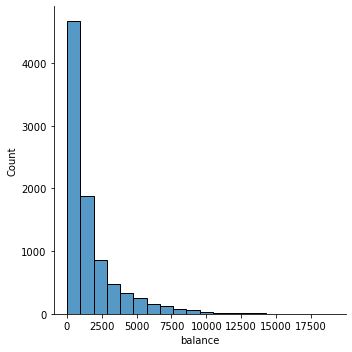

In [12]:
fig = plt.figure(figsize=(25, 20))
sns.displot(data['balance'],bins=20)

#### 1.2 Report any structure you find and any hypothesis you have about that structure.

In [13]:
data['balance'].describe()

count     8950.000000
mean      1564.458339
std       2081.528644
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: balance, dtype: float64

#### 1.3 Report mean and median balance, grouped by year and month of activated_date.

Extracting the year and month and creating new columns with them.

In [14]:
data['activated_date_year'] = pd.DatetimeIndex(data['activated_date']).year
data['activated_date_month'] = pd.DatetimeIndex(data['activated_date']).month

How many values belong to each year and month

In [15]:
data['activated_date_year'].value_counts()

2020.0    6307
2019.0    2630
Name: activated_date_year, dtype: int64

In [16]:
data['activated_date_month'].value_counts()

11.0    954
7.0     943
5.0     932
3.0     928
1.0     888
4.0     882
6.0     874
12.0    867
2.0     860
10.0    809
Name: activated_date_month, dtype: int64

Creating a group by filter from 'year' and 'month'

In [17]:
yeargrp = data.groupby(['activated_date_year'])
monthgrp = data.groupby(['activated_date_month'])

Creating an aggregate function to get to know the 'median' and 'mean' for each year and each month. 

In [18]:
yeargrp['balance'].agg(['median', 'mean'])

,median,mean
activated_date_year,,
2019.0,1208.810652,2099.215187
2020.0,724.614301,1342.278754


In [19]:
monthgrp['balance'].agg(['median', 'mean'])

,median,mean
activated_date_month,,
1.0,1174.706384,1853.430989
2.0,994.841733,1747.350977
3.0,828.954823,1554.973023
4.0,910.141912,1483.183191
5.0,734.557681,1214.333732
6.0,472.791862,939.997996
7.0,221.291290,649.717622
10.0,1524.409377,2482.234166
11.0,1082.071173,1848.704323


# Question 2

#### 2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a calculated field of cash_advance as a percentage of credit_limit.

In [20]:
data

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,activated_date_year,activated_date_month
0,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,...,0,2,1000.0,201.802084,139.509787,0.000000,12,0,2019.0,10.0
1,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2019.0,10.0
2,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2019.0,10.0
3,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,...,1,1,7500.0,0.000000,311.963409,0.000000,12,0,2019.0,10.0
4,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,...,0,1,1200.0,678.334763,244.791237,0.000000,12,0,2019.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,...,0,6,1000.0,325.594462,48.886365,0.500000,6,0,2020.0,7.0
8946,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,...,0,6,1000.0,275.861322,311.963409,0.000000,6,0,2020.0,7.0
8947,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,...,0,5,1000.0,81.270775,82.418369,0.250000,6,0,2020.0,7.0
8948,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,0,2020.0,7.0


Adding a new column to the dataframe regarding 'last_payment_date_year'

In [21]:
data['last_payment_date_year'] = pd.DatetimeIndex(data['last_payment_date']).year

Creating filter for 'activated_date_year' and 'last_payment_date_year' that happened on the year 2020

In [22]:
data[(data['activated_date_year'] == 2020) & (data['last_payment_date_year'] == 2020)]

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,activated_date_year,activated_date_month,last_payment_date_year
2633,C12709,2020-01-01,2020-05-08,2917.656276,1.000000,141.81,141.81,0.00,2431.292076,0.166667,...,2,8000.0,993.289914,1013.060637,0.00,12,0,2020.0,1.0,2020.0
2634,C12710,2020-01-01,2020-05-26,542.807485,1.000000,220.62,220.62,0.00,0.000000,0.166667,...,3,2000.0,608.782428,166.733071,0.00,12,0,2020.0,1.0,2020.0
2635,C12712,2020-01-01,2020-10-20,2362.643772,1.000000,2826.99,1496.59,1330.40,0.000000,1.000000,...,97,3000.0,1748.687628,984.331832,0.00,12,0,2020.0,1.0,2020.0
2636,C12713,2020-01-01,2020-08-22,4164.796859,1.000000,784.63,617.54,167.09,0.000000,0.454545,...,16,9000.0,1072.433416,1311.061985,0.00,11,0,2020.0,1.0,2020.0
2637,C12714,2020-01-01,2020-04-26,1304.460033,1.000000,0.00,0.00,0.00,78.763096,0.000000,...,0,1500.0,395.136073,368.588193,0.00,12,0,2020.0,1.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,...,6,1000.0,325.594462,48.886365,0.50,6,0,2020.0,7.0,2020.0
8946,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,...,6,1000.0,275.861322,311.963409,0.00,6,0,2020.0,7.0,2020.0
8947,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,...,5,1000.0,81.270775,82.418369,0.25,6,0,2020.0,7.0,2020.0
8948,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,...,0,500.0,52.549959,55.755628,0.25,6,0,2020.0,7.0,2020.0


Creating a calculated column to get the percentage credit limit

In [23]:
for i, row in data.iterrows():
    data.loc[i, 'percentage_credit_limit'] = row['cash_advance'] / row['credit_limit']

Creating new dataframe with the requested columns

In [24]:
data_q2 = data[['cust_id', 'activated_date', 'last_payment_date', 'cash_advance', 'credit_limit', 'percentage_credit_limit']].copy()

In [25]:
data_q2

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,percentage_credit_limit
0,C10001,2019-10-06,2020-09-09,0.000000,1000.0,0.000000
1,C10002,2019-10-06,2020-07-04,6442.945483,7000.0,0.920421
2,C10003,2019-10-06,2020-09-17,0.000000,7500.0,0.000000
3,C10004,2019-10-06,2020-08-24,205.788017,7500.0,0.027438
4,C10005,2019-10-06,2020-10-20,0.000000,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,2020-07-31,2020-11-03,0.000000,1000.0,0.000000
8946,C19187,2020-07-31,2020-09-06,0.000000,1000.0,0.000000
8947,C19188,2020-07-31,2020-06-03,0.000000,1000.0,0.000000
8948,C19189,2020-07-31,2020-07-19,36.558778,500.0,0.073118


Removing the character from the 'cust_id' column, and reformating the 'activated_date' column to YYYY-MM

In [26]:
data_q2['cust_id'] = data_q2['cust_id'].str[-5:]
data_q2['activated_date'] = data_q2['activated_date'].str[:-3]

In [27]:
data_q2

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,percentage_credit_limit
0,10001,2019-10,2020-09-09,0.000000,1000.0,0.000000
1,10002,2019-10,2020-07-04,6442.945483,7000.0,0.920421
2,10003,2019-10,2020-09-17,0.000000,7500.0,0.000000
3,10004,2019-10,2020-08-24,205.788017,7500.0,0.027438
4,10005,2019-10,2020-10-20,0.000000,1200.0,0.000000
...,...,...,...,...,...,...
8945,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,19189,2020-07,2020-07-19,36.558778,500.0,0.073118


In [28]:
data_q2 = data_q2[(data['activated_date_year'] == 2020) & (data['last_payment_date_year'] == 2020)]

In [29]:
data_q2

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,percentage_credit_limit
2633,12709,2020-01,2020-05-08,2431.292076,8000.0,0.303912
2634,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,12714,2020-01,2020-04-26,78.763096,1500.0,0.052509
...,...,...,...,...,...,...
8945,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,19189,2020-07,2020-07-19,36.558778,500.0,0.073118


# Question 3

Checking for the value counts of the column fraud we are finding out that only 0.0078% belongs to fraudulent cases. 

In [30]:
data['fraud'].value_counts(normalize=True)

0    0.992179
1    0.007821
Name: fraud, dtype: float64

#### 3.1 Build a predictive model for fraud.

Weghted logistic regression for dealing with an unbalanced class ('fraud')

In [31]:
data

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,activated_date_year,activated_date_month,last_payment_date_year,percentage_credit_limit
0,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,...,1000.0,201.802084,139.509787,0.000000,12,0,2019.0,10.0,2020.0,0.000000
1,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0,2019.0,10.0,2020.0,0.920421
2,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,...,7500.0,622.066742,627.284787,0.000000,12,0,2019.0,10.0,2020.0,0.000000
3,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,...,7500.0,0.000000,311.963409,0.000000,12,0,2019.0,10.0,2020.0,0.027438
4,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,...,1200.0,678.334763,244.791237,0.000000,12,0,2019.0,10.0,2020.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,...,1000.0,325.594462,48.886365,0.500000,6,0,2020.0,7.0,2020.0,0.000000
8946,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,...,1000.0,275.861322,311.963409,0.000000,6,0,2020.0,7.0,2020.0,0.000000
8947,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,...,1000.0,81.270775,82.418369,0.250000,6,0,2020.0,7.0,2020.0,0.000000
8948,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,...,500.0,52.549959,55.755628,0.250000,6,0,2020.0,7.0,2020.0,0.073118


Importing libraries for the test

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score


X = data.drop(['cust_id', 'activated_date', 'last_payment_date', 'activated_date_year', 'activated_date_month', 'last_payment_date_year'],axis=1)
y = data['fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [33]:
X

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,percentage_credit_limit
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0.920421
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,311.963409,0.000000,12,0,0.027438
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,0.000000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,311.963409,0.000000,6,0,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,0.000000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0,0.073118


Building a logistic regression model with default weights

In [44]:
lgr1 = LogisticRegression(random_state=13, class_weight=None, max_iter=5000)
# fit it
lgr1.fit(X_train,y_train)
# test
y_pred = lgr1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')

Accuracy Score: 0.9992551210428305
Confusion Matrix: 
[[2667    0]
 [   2   16]]
Area Under Curve: 0.9444444444444444
Recall score: 0.8888888888888888
F1 score: 0.9411764705882353


The model is apparently working. However, lets create a weighted logistic regression to see what we get.

In [64]:
# define class weights
w = {0:1, 1:99}
# define model
lgr2 = LogisticRegression(random_state=13, class_weight='balanced', max_iter=400)
# fit it
lgr2.fit(X_train,y_train)
# test
y_pred = lgr2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')

Accuracy Score: 0.9996275605214152
Confusion Matrix: 
[[2666    1]
 [   0   18]]
Area Under Curve: 0.9998125234345706
Recall score: 1.0
F1 score: 0.972972972972973


We had no luck with the full set of features added in this case, so lets feature select and try something different.

#### Creating a correlation heatmap to check is there's multicollinearity

In [65]:
data.corr()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,activated_date_year,activated_date_month,last_payment_date_year,percentage_credit_limit
balance,1.000000,0.322409,0.181275,0.164358,0.126487,0.494262,-0.077954,0.073196,-0.063189,0.449206,...,0.531315,0.322814,0.397484,-0.318956,0.072784,0.203267,-0.165698,0.065228,NaN,0.175231
balance_frequency,0.322409,1.000000,0.133674,0.104323,0.124292,0.097844,0.229715,0.202415,0.176079,0.191873,...,0.095931,0.065008,0.131096,-0.095082,0.119776,0.035241,-0.062112,0.007184,NaN,0.054015
purchases,0.181275,0.133674,1.000000,0.916845,0.679896,-0.051032,0.393017,0.498430,0.315567,-0.120143,...,0.356977,0.603264,0.095647,0.180379,0.086288,0.520895,-0.113677,0.058632,NaN,-0.122043
oneoff_purchases,0.164358,0.104323,0.916845,1.000000,0.330622,-0.031287,0.264937,0.524891,0.127729,-0.082628,...,0.319735,0.567292,0.050156,0.132763,0.064150,0.475725,-0.109259,0.055962,NaN,-0.091316
installments_purchases,0.126487,0.124292,0.679896,0.330622,1.000000,-0.063270,0.442418,0.214042,0.511351,-0.132318,...,0.256515,0.384084,0.133868,0.182569,0.086143,0.357483,-0.067746,0.035648,NaN,-0.120873
cash_advance,0.494262,0.097844,-0.051032,-0.031287,-0.063270,1.000000,-0.215221,-0.087277,-0.176141,0.624533,...,0.302129,0.450422,0.140879,-0.152417,-0.068789,0.200551,-0.064527,0.032954,NaN,0.614200
purchases_frequency,-0.077954,0.229715,0.393017,0.264937,0.442418,-0.215221,1.000000,0.501343,0.862934,-0.308478,...,0.119833,0.103464,0.006086,0.305802,0.061506,0.071416,-0.041982,0.044429,NaN,-0.290313
oneoff_purchases_frequency,0.073196,0.202415,0.498430,0.524891,0.214042,-0.087277,0.501343,1.000000,0.142329,-0.111716,...,0.295059,0.243537,-0.027455,0.157531,0.082466,0.120314,-0.120952,0.046755,NaN,-0.152257
purchases_installments_frequency,-0.063189,0.176079,0.315567,0.127729,0.511351,-0.176141,0.862934,0.142329,1.000000,-0.262958,...,0.060794,0.085551,0.032085,0.250087,0.073275,0.071719,-0.012797,0.037999,NaN,-0.237082
cash_advance_frequency,0.449206,0.191873,-0.120143,-0.082628,-0.132318,0.624533,-0.308478,-0.111716,-0.262958,1.000000,...,0.132608,0.183192,0.100323,-0.249773,-0.133372,0.070455,-0.010923,-0.002096,NaN,0.558828


<AxesSubplot:>

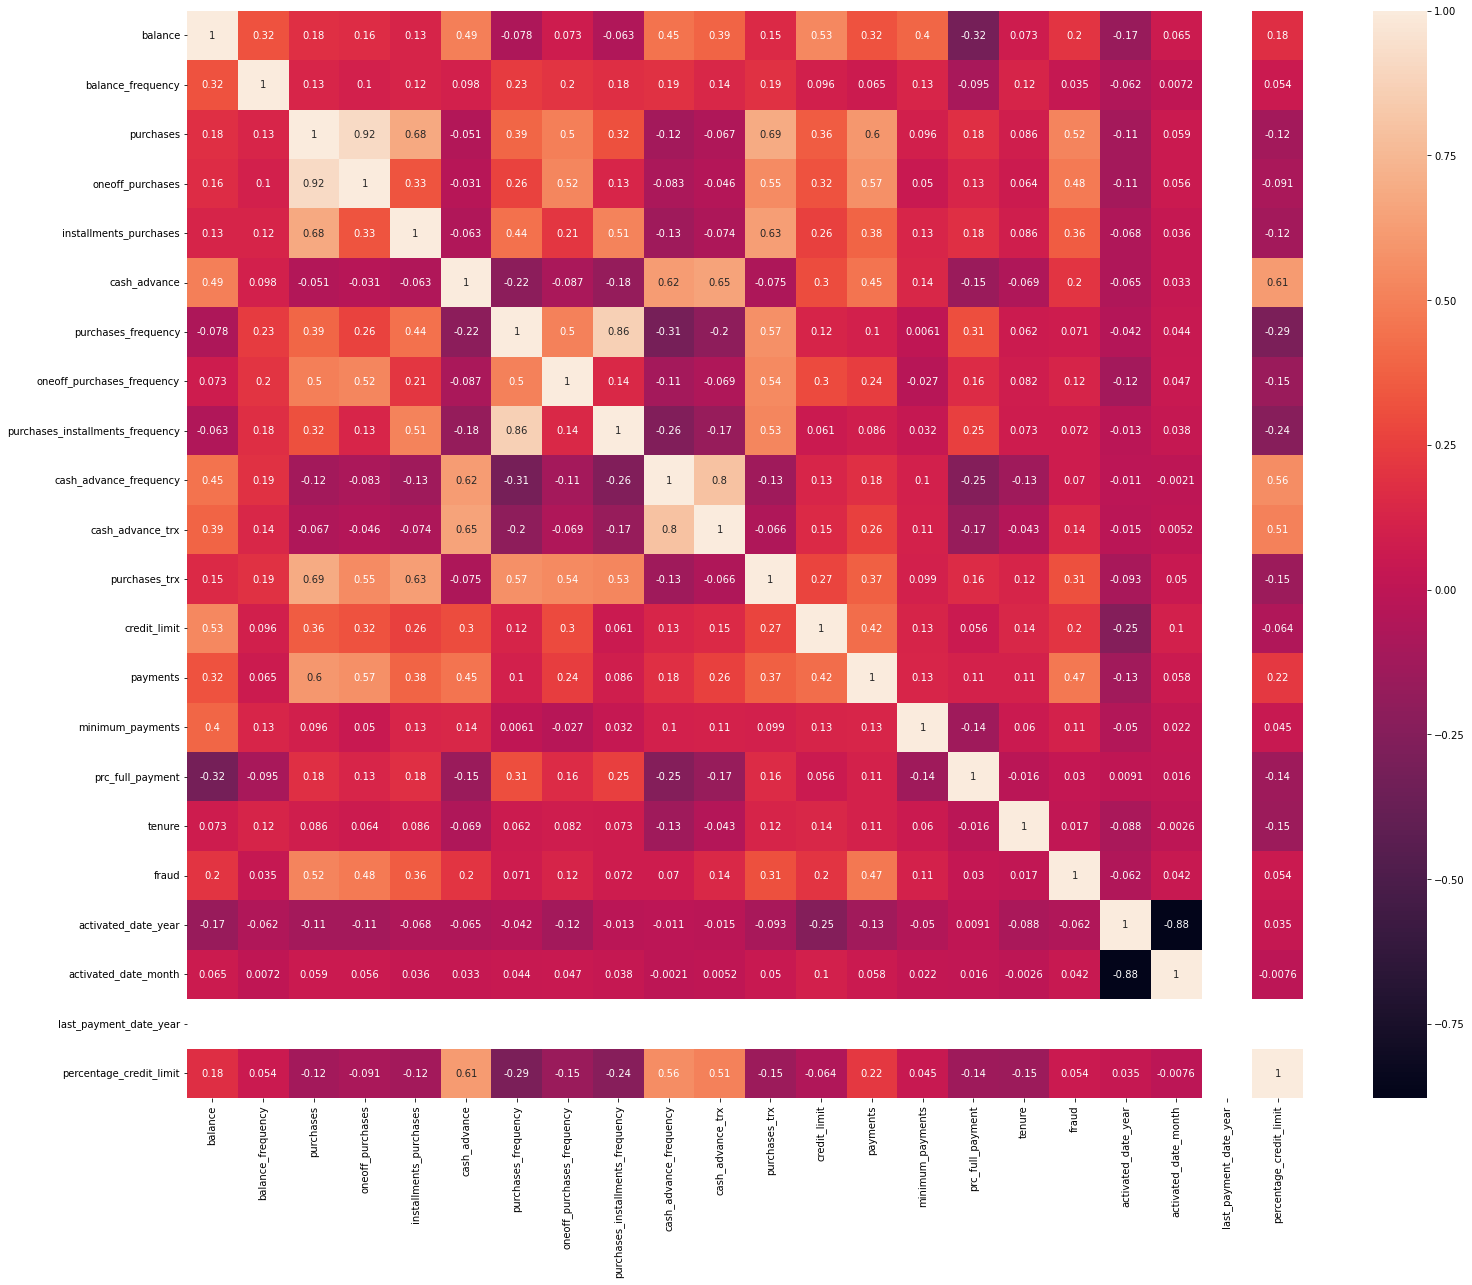

In [66]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True)

#### It appears that there's some correlation between some variables and the target: purchases, oneoff_purchases, installments_purchases and payments

In [67]:
data.groupby('fraud').mean()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,activated_date_year,activated_date_month,last_payment_date_year,percentage_credit_limit
fraud,,,,,,,,,,,,,,,,,,,,,
0,1526.894650,0.876530,904.3953,522.331735,382.366113,941.828990,0.487806,0.199271,0.361907,0.133892,...,14.024775,4429.428844,1612.482967,821.893132,0.152943,11.515315,2019.708244,6.074884,2020.0,0.239414
1,6329.680703,0.971299,13537.9000,9485.838000,4052.062000,5691.931581,0.813182,0.606713,0.685470,0.293939,...,101.614286,12721.428571,17039.838972,3695.431200,0.251594,11.771429,2019.385714,7.814286,2020.0,0.523793


In [68]:
from sklearn.model_selection import train_test_split

X = data[['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'payments']]
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [69]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
#logmodel.score(X_test, y_test)

Accuracy Score: 0.9988826815642458
Confusion Matrix: 
[[1781    0]
 [   2    7]]
Area Under Curve: 0.8888888888888888
Recall score: 0.7777777777777778
F1 score: 0.8750000000000001


#### With the feature selection we can see that out F1 score improved to and 80%. However, part of the F1 score is the recall score and its kinda low, with 66%. Lets try to balance the data with SMOTE.

### SMOTE

In [70]:
!pip install imbalanced-learn

In [71]:
y.value_counts()

0    8880
1      70
Name: fraud, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [73]:
y_sm.value_counts()

0    8880
1    8880
Name: fraud, dtype: int64

In [74]:
y_test.value_counts()

0    1781
1       9
Name: fraud, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [77]:
y_test.value_counts()

1    1776
0    1776
Name: fraud, dtype: int64

In [78]:
y_train.value_counts()

0    7104
1    7104
Name: fraud, dtype: int64

In [79]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')

Accuracy Score: 0.9135698198198198
Confusion Matrix: 
[[1704   72]
 [ 235 1541]]
Area Under Curve: 0.9135698198198198
Recall score: 0.8676801801801802
F1 score: 0.9094128061375037


#### With feature selection and SMOTE, we increased our F1 score to 89% and also the Recall Score to 84%. While still gettin a 90% accuracy. 

#### 3.2 What explanatory variable was the most powerful predictor for fraud?

It appears that there's some correlation between some variables and the target: purchases, oneoff_purchases, installments_purchases and payments